### Bikes Dataset

Hier een jupyter notebook bestand waar jullie in kunnen werken. Denk aan het lesmateriaal van afgelopen middag. 

# Assignment

Stel je een casus voor. Een fietsenmakerbedrijf heeft moeite met de verkoop van fietsen aan zijn of haar klanten en doet wanhopige pogingen om klanten te lokken bij zijn bedrijf. Er zijn gewoon te veel factoren voor de fietsenmaker om te voorspellen wie je moet bereiken. Hij besluit een datascientist in te huren die in één dag tijd uit zijn data bruikbare informatie probeert te halen.  Dit kan op enkele manieren, namelijk, door (i) inzicht te geven in de relaties tussen attributen in de dataset, (ii) deze relaties te visualiseren, (iii) te laten zien welke attributen (features) van belang zijn voor het voorspellen van een potentiele klant en (iv) hoe goed een model kan voorspellen wie van een nieuwe test-set klanten wel of niet een fiets gaat kopen. 
 
Presenteer je bevindingen en proces in een verslag. Dit mag in een jupyter notebook bestand of in een word-bestand. Je mag bij deze opdracht gebruik maken van WEKA en van PYTHON (en natuurlijk jupyter notebook). Hou de volgende structuur aan in je verslag:  
 
Weka leent zich goed voor om de data te importeren en snel in te zien. Verschillende relaties te herkennen en algoritmes snel op toe te passen.  
 
Python leent zich goed voor het verkennen en aanpassen van de data. Er missen hier en daar waardes die opgevuld dienen te worden.  
 
Beoordeling 
 
Je wordt bij deze opdracht beoordeeld op de volgende criteria:  
 
1. De navolgbaarheid van je proces. Als opdrachtgever wil je het proces kunnen begrijpen van je datascientist. Waarom heeft hij/zij deze en deze keuze gemaakt? Wat voegt het toe aan de wens van de opdrachtgever? 
2. Is de data voldoende geïnterpreteerd en uitgelegd? Leg bijvoorbeeld per attribuut uit of het een (grote) rol speelt voor het voorspellen van het wel of niet kopen van een fiets. Kijk of je een plot kan maken van de data (wij de docenten zullen hier morgen ondersteuning voor geven).  
3. Heb je kunnen voorspellen wie er van de test-set een fiets heeft gekocht of niet. We zullen hier niet streng op zijn sinds het concept hiervan nog vrij lastig is. De voorspelling mag zowel met WEKA als met PYTHON gemaakt worden. Nog beter als je het met beide doet. 

# Exploration


First we'll start with importing the csv and looking at the contents of the file

In [1]:
import pandas as pd
bikes = pd.read_csv('bikes.csv')

In [2]:
bikes.info()
bikes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
ID                  1000 non-null int64
Marital Status      1000 non-null object
Gender              1000 non-null object
Income              932 non-null float64
Children            1000 non-null int64
Education           1000 non-null object
Occupation          1000 non-null object
Home Owner          1000 non-null object
Cars                1000 non-null int64
Commute Distance    1000 non-null object
Region              995 non-null object
Age                 989 non-null float64
Purchased Bike      1000 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5,Partial College,Professional,No,2,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36.0,Yes ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2,High School,Professional,Yes,2,2-5 Miles,North America,54.0,
996,28672,Single,Male,NaN,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35.0,
997,11809,Married,Male,60000.0,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38.0,
998,19664,Single,Male,100000.0,3,Bachelors,Management,No,3,1-2 Miles,North America,38.0,


We can see the contents of the file, columns and the datatype of the columns

In [3]:
bikes.info()
bikes
bikes.keys()










<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
ID                  1000 non-null int64
Marital Status      1000 non-null object
Gender              1000 non-null object
Income              932 non-null float64
Children            1000 non-null int64
Education           1000 non-null object
Occupation          1000 non-null object
Home Owner          1000 non-null object
Cars                1000 non-null int64
Commute Distance    1000 non-null object
Region              995 non-null object
Age                 989 non-null float64
Purchased Bike      1000 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike '],
      dtype='object')

Info shows us that many of the fields are Objects and that we've got missing values. Here we also encounter our first pitfall : bikes gives us the entire contents and we can see "empty" fields in the column Purchased Bikes. .Info() however , tells us that 1000/1000 of the fields are filled with values. These emtpy field therefore aren't empty.
Keys gives us the Second pitfall : the column Purchased Bike has an extra space in the name

# Datacleaning

First we'll start with the cleaning of our data, we'll do this column by column

## ID
Is there anything in ID we can work with? Sort should give us a first indication


In [4]:
bikes.sort_values(by=['ID'])

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
306,11000,Married,Male,90000.0,2,Bachelors,Professional,Yes,0,1-2 Miles,Pacific,40.0,Yes
186,11047,Married,Female,30000.0,3,High School,Skilled Manual,No,2,1-2 Miles,Pacific,56.0,Yes
441,11061,Married,Male,80000.0,2,Partial College,Skilled Manual,Yes,2,5-10 Miles,Pacific,52.0,Yes
924,11090,Single,Male,90000.0,2,Partial College,Professional,Yes,1,2-5 Miles,North America,48.0,
411,11116,Married,Male,70000.0,5,Partial College,Skilled Manual,Yes,2,5-10 Miles,Pacific,43.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,29337,Single,Male,30000.0,2,Partial College,Clerical,Yes,2,5-10 Miles,Pacific,68.0,No
66,29355,Married,Female,40000.0,0,Graduate Degree,Clerical,Yes,0,0-1 Miles,Europe,37.0,Yes
44,29380,Married,Female,20000.0,3,High School,Manual,Yes,0,0-1 Miles,Europe,41.0,Yes
337,29424,Married,Male,10000.0,0,Partial High School,Manual,Yes,2,0-1 Miles,Europe,32.0,No


The ID values don't start with 1 and aren't all used. How about uniqueness?

In [5]:
bikes.nunique()

ID                  1000
Marital Status         2
Gender                 2
Income                16
Children               6
Education              5
Occupation             5
Home Owner             2
Cars                   5
Commute Distance       5
Region                 3
Age                   53
Purchased Bike        79
dtype: int64

all of the IDs are unique and so might be of low value to us , atleast for our training purposes. We can mark this as "Might be dropped"

## Marital Status + Gender
nunique gave us only 2 Marital Statusses and Genders , we can directly recode this with the labelencoder in sklearn.preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
bikes['Marital_Status_RC'] = le.fit_transform(bikes['Marital Status'])
bikes['Gender_RC'] = le.fit_transform(bikes['Gender'])
bikes

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Marital_Status_RC,Gender_RC
0,12496,Married,Female,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42.0,No,0,0
1,24107,Married,Male,30000.0,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43.0,No,0,1
2,14177,Married,Male,80000.0,5,Partial College,Professional,No,2,2-5 Miles,Europe,60.0,No,0,1
3,24381,Single,Male,70000.0,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41.0,Yes,1,1
4,25597,Single,Male,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36.0,Yes ...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2,High School,Professional,Yes,2,2-5 Miles,North America,54.0,,0,1
996,28672,Single,Male,NaN,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35.0,,1,1
997,11809,Married,Male,60000.0,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38.0,,0,1
998,19664,Single,Male,100000.0,3,Bachelors,Management,No,3,1-2 Miles,North America,38.0,,1,1


We can now see that in Martital Status, Married has been recoded to 0 , as is Female in Gender

## Income
Income is the first column that has missing values, but we'll return to those after the cleaning part
First lets see the unique entries to see if we need to clean anything

In [7]:
bikes.Income.unique()

array([ 40000.,  30000.,  80000.,  70000.,  10000., 160000.,  20000.,
        90000., 170000.,  60000.,     nan, 100000., 130000., 120000.,
        50000., 110000., 150000.])

We can see that every value is marked as a float but can as easily be marked as an Int.

Some digging showed me the reason for the float; NaN is a type of float and I'm not allowed to recast it without first replacing the NaNs (bikes['Income_int'] =bikes['Income'].astype('int64'))

## Children
lets see if Children has any weird values or missing values

In [8]:
bikes.Children.unique()

array([1, 3, 5, 0, 2, 4])

everything seems to be in order , no action needed for now

## Education
lets see if Education has any weird values or missing values

In [9]:
bikes.Education.unique()

array(['Bachelors', 'Partial College', 'High School',
       'Partial High School', 'Graduate Degree'], dtype=object)

everything seems to be in order , but we can't use these values. Time to re-encode them

In [10]:
bikes['Education_RC'] = le.fit_transform(bikes['Education'])

With a lot of unique values , we're starting to lose oversight in the used codes for the catogories , time to switch to a more manual approach for these.

In [11]:
#First let's drop the recoded Education
bikes.drop(columns=['Education_RC'],axis=1)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Marital_Status_RC,Gender_RC
0,12496,Married,Female,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42.0,No,0,0
1,24107,Married,Male,30000.0,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43.0,No,0,1
2,14177,Married,Male,80000.0,5,Partial College,Professional,No,2,2-5 Miles,Europe,60.0,No,0,1
3,24381,Single,Male,70000.0,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41.0,Yes,1,1
4,25597,Single,Male,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36.0,Yes ...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2,High School,Professional,Yes,2,2-5 Miles,North America,54.0,,0,1
996,28672,Single,Male,NaN,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35.0,,1,1
997,11809,Married,Male,60000.0,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38.0,,0,1
998,19664,Single,Male,100000.0,3,Bachelors,Management,No,3,1-2 Miles,North America,38.0,,1,1


In [12]:
#Recreate manually
bikes['Education_RC'] = bikes['Education'].map( {'Bachelors': 0, 'Partial College': 1, 'High School': 2, 'Partial High School': 3, 'Graduate Degree': 4} ).astype(int)


## Occupation
lets see if Occupation has any weird values or missing values

In [13]:
bikes.Occupation.unique()

array(['Skilled Manual', 'Clerical', 'Professional', 'Manual',
       'Management'], dtype=object)

everything seems to be in order , but we can't use these values. Time to re-encode them

In [14]:
bikes['Occupation_RC'] = bikes['Occupation'].map( {'Skilled Manual': 0, 'Clerical': 1, 'Professional': 2, 'Manual': 3, 'Management': 4} ).astype(int)


## Home Owner
We've already seen that Home Owner only has 2 values ; yes and no.We can't use these values so time to re-encode them

In [15]:
bikes['Home_Owner_RC'] = bikes['Home Owner'].map( {'No': 0, 'Yes': 1} ).astype(int)


## Cars
Cars already is an int and has 1000 values but let's check the uniques to be sure

In [16]:
bikes.Cars.unique()

array([0, 1, 2, 4, 3])

Everyhing seems to be in order and because it's an int already , no need to reencode.

## Commute Distance
is an object filled with 1000 values but it's a mix between letters and numbers.
let's see the uniques

In [17]:
bikes['Commute Distance'].unique()

array(['0-1 Miles', '2-5 Miles', '5-10 Miles', '1-2 Miles', '10+ Miles'],
      dtype=object)

The uniques are clear but we'll need to reform the values. we'll removes all the miles and use the max distance instead of the spread. Using 11 for 10+

In [18]:
#First remove all the non-digits
bikes['Commute Distance_RC'] = bikes['Commute Distance'].str.replace(r'\D', '').astype(int)

In [19]:
#recode
bikes['Commute Distance_RC'] = bikes['Commute Distance_RC'].map( {1:1, 25: 5,10: 11, 510: 10, 12: 2}  )
#1 still has to be mapped, otherwise it seems to be replaced with NaN

## Region
Region has 5 missing values to start with , lets see the rest

In [20]:
bikes.Region.unique()

array(['Europe', 'Pacific', nan, 'North America'], dtype=object)

we'll need to recode. to make them usefull but first we'll need to replace the NaN and remember to "fix" it later

In [21]:
bikes['Region'].fillna('Unknown', inplace = True) 
bikes['Region_RC'] = bikes['Region'].map( {'Europe': 0, 'Pacific': 1,'North America':2,'Unknown':99} ).astype(int)

## Age 
Income is the third column that has missing values, but we'll return to those after the cleaning part. First lets see the unique entries to see if we need to clean anything

In [22]:
bikes.Age.unique()

array([42., 43., 60., 41., 36., 50., 33., 58., 48., 54., 55., 35., 45.,
       38., 59., 47., 56., 34., 63., 29., 40., 44., 32., 26., 31., 62.,
       30., 28., 65., 66., 46., 52., 39., 61., 37., 68., 51., nan, 49.,
       53., 27., 25., 67., 57., 70., 78., 69., 64., 89., 80., 73., 74.,
       71., 72.])

No cleaning needed

## Purchased Bike
The first small fix is fixing the title and removing the extra space : 


In [23]:
bikes['Purchased Bike'] = bikes['Purchased Bike ']

We know that the 1000 values were filled in but we're also told that our extra set in contained within. lets see the uniques

In [24]:
bikes['Purchased Bike'].unique()

array(['No                                       ',
       'No                                         ',
       'No                                      ',
       'Yes                                         ',
       'Yes                                                ',
       'Yes                                        ',
       'No                                   ',
       'Yes                                          ',
       'Yes                                    ',
       'No                                          ',
       'No                                    ',
       'Yes                                   ',
       'Yes                                             ',
       'No                                             ',
       'Yes                                      ',
       'Yes                                              ',
       'No                                              ',
       'No                                                ',
       'No      

A lot of extra empty spaces, let's remove these first

In [25]:
bikes['Purchased Bike' ]= bikes['Purchased Bike'].str.strip()

In [26]:
bikes['Purchased Bike'].unique()

array(['No', 'Yes', ''], dtype=object)

we know that the left over empty spaces are the testset that we have to split off but the spaces aren't truelly empty. lets replace those white spaces with NaN values :

In [27]:
import numpy as np
bikes = bikes.replace(r'^\s*$', np.nan, regex=True)

In [28]:
bikes['Purchased Bike'].unique()

array(['No', 'Yes', nan], dtype=object)

# Fill missing data

We know that Income , Region and Age have missing values. Let's see if we can fill these

## Age

In [29]:
# Before
bikes[bikes.Age.isna()]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Age,Purchased Bike,Marital_Status_RC,Gender_RC,Education_RC,Occupation_RC,Home_Owner_RC,Commute Distance_RC,Region_RC,Purchased Bike
98,19441,Single,Male,40000.0,0,Graduate Degree,Clerical,Yes,0,0-1 Miles,...,NaN,Yes,1,1,4,1,1,1,0,Yes
196,16209,Single,Female,50000.0,0,Graduate Degree,Skilled Manual,Yes,0,1-2 Miles,...,NaN,No,1,0,4,0,1,2,0,No
292,20923,Married,Female,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,...,NaN,Yes,0,0,0,0,1,1,0,Yes
322,16410,Single,Female,10000.0,4,Partial High School,Manual,Yes,2,0-1 Miles,...,NaN,Yes,1,0,3,3,1,1,0,Yes
324,22930,Married,Male,90000.0,4,Bachelors,Professional,Yes,0,1-2 Miles,...,NaN,Yes,0,1,0,2,1,2,1,Yes
423,27169,Single,Male,NaN,0,High School,Manual,Yes,1,2-5 Miles,...,NaN,Yes ...,1,1,2,3,1,5,0,Yes
537,14900,Married,Female,40000.0,1,Partial College,Clerical,Yes,1,1-2 Miles,...,NaN,Yes,0,0,1,1,1,2,2,Yes
732,26625,Single,Female,60000.0,0,Graduate Degree,Professional,Yes,1,2-5 Miles,...,NaN,Yes,1,0,4,2,1,5,2,Yes
853,24801,Single,Male,60000.0,1,Graduate Degree,Professional,Yes,0,2-5 Miles,...,NaN,NaN,1,1,4,2,1,5,2,NaN
884,19731,Married,Male,80000.0,4,Graduate Degree,Management,Yes,2,5-10 Miles,...,NaN,NaN,0,1,4,4,1,10,2,NaN


In [30]:
for i in range(len(bikes[bikes.Age.isna()])):
#    print('1i',i)
#    print('len',len(bikes[bikes.Age.isna()]))
    
    children_missing = bikes[bikes.Age.isna()].iloc[0].Children
    education_missing = bikes[bikes.Age.isna()].iloc[0].Education_RC
    gender_missing = bikes[bikes.Age.isna()].iloc[0].Gender_RC
    id_missing = bikes[bikes.Age.isna()].iloc[0].ID
    cars_missing = bikes[bikes.Age.isna()].iloc[0].Cars
    marital_missing = bikes[bikes.Age.isna()].iloc[0].Marital_Status_RC
    home_owner_missing = bikes[bikes.Age.isna()].iloc[0].Home_Owner_RC
    mean_age = np.nan
    
    
    
#    print('children_missing',children_missing)
#    print('education_missing',education_missing)
#    print('id_missing',id_missing)
    if len(bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) & (bikes['Cars']==cars_missing)& (bikes['Home_Owner_RC']==home_owner_missing)& (bikes['Marital_Status_RC']==marital_missing) ]) >1:
        mean_age = bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) & (bikes['Cars']==cars_missing)& (bikes['Home_Owner_RC']==home_owner_missing)& (bikes['Marital_Status_RC']==marital_missing) ].mean().Age
#    print('MEAN',mean_age)
    while np.isnan(mean_age) == True:
        if len(bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) & (bikes['Cars']==cars_missing)& (bikes['Home_Owner_RC']==home_owner_missing)& (bikes['Marital_Status_RC']==marital_missing) ]) >1:
            mean_age = bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) & (bikes['Cars']==cars_missing)& (bikes['Home_Owner_RC']==home_owner_missing)& (bikes['Marital_Status_RC']==marital_missing) ].mean().Age
        if len(bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) & (bikes['Cars']==cars_missing)& (bikes['Marital_Status_RC']==marital_missing) ]) >1:
            mean_age = bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) & (bikes['Cars']==cars_missing)& (bikes['Marital_Status_RC']==marital_missing) ].mean().Age
        if len(bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) & (bikes['Cars']==cars_missing) ])>1:
            mean_age = bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) & (bikes['Cars']==cars_missing) ].mean().Age
        if len(bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) ])>1:
            mean_age = bikes[(bikes['Children'] == children_missing) & (bikes['Education_RC']==education_missing) & (bikes['Gender_RC']==gender_missing) ].mean().Age
        if len(bikes[(bikes['Children'] == children_missing) & (bikes['Gender_RC']==gender_missing) ]) >1:
            mean_age = bikes[(bikes['Children'] == children_missing) & (bikes['Gender_RC']==gender_missing) ].mean().Age
        if len(bikes[(bikes['Gender_RC']==gender_missing) ]) >1:
            mean_age = bikes[(bikes['Gender_RC']==gender_missing) ].mean().Age
        mean_age = bikes.mean().Age
#        print('Nieuwe Mean',mean_age)
    
#     print('is dit nan?',bikes[bikes.Age.isna()].Age.iloc[i])
#    bikes.loc[bikes.ID == id_missing, 'Age'] = bikes.loc[bikes.ID == id_missing, 'Age'].fillna(np.nan, mean_age)
#    bikes[bikes.Age.isna()].iloc[0].Age = mean_age
#    bikes[bikes.Age.isna()].at[bikes.[bikes.Age.isna()].index[0], 'Age'] = mean_age
#    bikes[bikes.Age.isna()].iloc[0].Age=mean_age
#    df.at[df.index[-1], 'a'] = 4000
    bikes.at[ bikes[bikes.Age.isna()].index[0],'Age'] = mean_age
#    bikes[bikes.Income.isna()].at[]

  
#     i = 0
#     if len(bikes[bikes.Age.isna()]) == 0:
#            break


In [31]:
#After
bikes[bikes.Age.isna()]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Age,Purchased Bike,Marital_Status_RC,Gender_RC,Education_RC,Occupation_RC,Home_Owner_RC,Commute Distance_RC,Region_RC,Purchased Bike


## Income

In [32]:
#Before
bikes[bikes.Income.isna()]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Age,Purchased Bike,Marital_Status_RC,Gender_RC,Education_RC,Occupation_RC,Home_Owner_RC,Commute Distance_RC,Region_RC,Purchased Bike
22,19193,Single,Male,NaN,2,Partial College,Clerical,Yes,0,1-2 Miles,...,35.0,Yes,1,1,1,1,1,2,0,Yes
23,26412,Married,Female,NaN,5,High School,Management,No,3,5-10 Miles,...,56.0,No,0,0,2,4,0,10,0,No
24,27184,Single,Male,NaN,2,Partial College,Clerical,No,1,0-1 Miles,...,34.0,No ...,1,1,1,1,0,1,0,No
33,18484,Single,Male,NaN,2,High School,Skilled Manual,No,2,1-2 Miles,...,50.0,Yes,1,1,2,0,0,2,1,Yes
47,29097,Single,Female,NaN,2,Partial College,Skilled Manual,Yes,2,5-10 Miles,...,52.0,Yes,1,0,1,0,1,10,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,20401,Married,Female,NaN,4,Bachelors,Management,Yes,2,1-2 Miles,...,64.0,NaN,0,0,0,4,1,2,2,NaN
978,17450,Married,Male,NaN,5,Partial College,Professional,Yes,3,5-10 Miles,...,45.0,NaN,0,1,1,2,1,10,2,NaN
979,17337,Single,Male,NaN,0,High School,Skilled Manual,Yes,1,5-10 Miles,...,31.0,NaN,1,1,2,0,1,10,2,NaN
993,11292,Single,Male,NaN,1,Partial College,Professional,No,3,0-1 Miles,...,44.0,NaN,1,1,1,2,0,1,2,NaN


In [33]:
#yy = bikes.loc[(bikes['Gender'] == 'Male') & (bikes['Income'].isna())]
#yy.sort_values(by=['Age'])
#bikes[bikes.Income.isna()].sort_values(by=['Age'])
for i in range(len(bikes[bikes.Income.isna()])):
#    print('1i',i)
#    print('len',len(bikes[bikes.Income.isna()]))
    age_missing = bikes[bikes.Income.isna()].iloc[0].Age
    gender_missing = bikes[bikes.Income.isna()].iloc[0].Gender_RC
    education_missing = bikes[bikes.Income.isna()].iloc[0].Education_RC
    region_missing = bikes[bikes.Income.isna()].iloc[0].Region_RC
    id_missing = bikes[bikes.Income.isna()].iloc[0].ID
    mean_income = np.nan
#    print('age_missing',age_missing)
#    print('gender_missing',gender_missing)
#    print('education_missing',education_missing)
#    print('id_missing',id_missing)
#    print('region_missing',region_missing)
    mean_income = bikes[(bikes['Gender_RC'] == gender_missing) & (bikes['Education_RC']==education_missing) & (bikes['Age']==age_missing)& (bikes['Region_RC']==region_missing)].mean().Income
    if np.isnan(mean_income) == True:
#        print('NAN')
        x = 0
        mean_income_add = np.nan
        while np.isnan(mean_income_add) == True:
            x += 1
            mean_income_add = bikes[(bikes['Gender_RC'] == gender_missing) & (bikes['Education_RC']==education_missing) & (bikes['Age']==age_missing+x)& (bikes['Region_RC']==region_missing)].mean().Income
            if x == 10:
                mean_income_add = mean_income = bikes[(bikes['Gender_RC'] == gender_missing) & (bikes['Education_RC']==education_missing) & (bikes['Region_RC']==region_missing)].mean().Income
                break;
        x = 1
        mean_income_minus = np.nan
        while np.isnan(mean_income_minus) == True:
            mean_income_minus = bikes[(bikes['Gender_RC'] == gender_missing) & (bikes['Education_RC']==education_missing) & (bikes['Age']==age_missing-x)& (bikes['Region_RC']==region_missing)].mean().Income
            x += 1
            if x == 10:
                mean_income_minus = mean_income = bikes[(bikes['Gender_RC'] == gender_missing) & (bikes['Education_RC']==education_missing) & (bikes['Region_RC']==region_missing)].mean().Income
                break;

        mean_income = (mean_income_add+mean_income_minus)/2
#        print('add',mean_income_add)
#        print('minus',mean_income_minus)
#        print('Nieuwe mean',mean_income)
#    print('2i',i)
#    print('MEAN',mean_income)
    
#    print('is dit nan?',bikes[bikes.Income.isna()].Income.iloc[0])
    #bikes[bikes.Income.isna()].Income.iloc[i] = mean_income
    #bikes[bikes.Income.isna()].set_value(i, 'Income', mean_income)
    #bikes[bikes.Income.isna()].at[i, 'Income'] = mean_income
    #bikes.loc[bikes.ID == id_missing, 'Income'] = bikes.loc[bikes.ID == id_missing, 'Income'].replace(np.nan, mean_income)
    #bikes.loc[bikes.ID == id_missing, 'Income'] = mean_income
    bikes.at[ bikes[bikes.Income.isna()].index[0],'Income'] = mean_income
#    print("_____________________________________")



In [34]:
#After
bikes[bikes.Income.isna()]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Age,Purchased Bike,Marital_Status_RC,Gender_RC,Education_RC,Occupation_RC,Home_Owner_RC,Commute Distance_RC,Region_RC,Purchased Bike


# Region

In [35]:
#Before
bikes[bikes['Region_RC'] == 99]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Age,Purchased Bike,Marital_Status_RC,Gender_RC,Education_RC,Occupation_RC,Home_Owner_RC,Commute Distance_RC,Region_RC,Purchased Bike
56,12808,Married,Male,40000.0,0,Bachelors,Clerical,Yes,0,0-1 Miles,...,38.0,Yes ...,0,1,0,1,1,1,99,Yes
70,14238,Married,Male,120000.0,0,Partial High School,Professional,Yes,4,10+ Miles,...,36.0,Yes,0,1,3,2,1,11,99,Yes
280,14804,Single,Female,10000.0,3,Partial High School,Manual,Yes,2,0-1 Miles,...,43.0,No,1,0,3,3,1,1,99,No
424,14805,Single,Female,10000.0,3,Partial High School,Manual,Yes,2,0-1 Miles,...,43.0,No ...,1,0,3,3,1,1,99,No
604,25261,Married,Male,40000.0,0,High School,Skilled Manual,Yes,2,5-10 Miles,...,27.0,No,0,1,2,0,1,10,99,No


In [36]:
import statistics
for i in range(len(bikes.loc[bikes['Region_RC'] == 99])):
    age_missing = bikes.loc[bikes['Region_RC'] == 99].iloc[0].Age
    gender_missing = bikes.loc[bikes['Region_RC'] == 99].iloc[0].Gender_RC
    income_missing = bikes.loc[bikes['Region_RC'] == 99].iloc[0].Income
#    print ('age_missing',age_missing)
#    print ('gender_missing',gender_missing)
#    print ('income_missing',income_missing)
    mode_region = None
    if len(bikes[(bikes['Gender_RC'] == gender_missing) & (bikes['Age']==age_missing) & (bikes['Income']==income_missing) & (bikes['Region_RC']!= 99) ]) >1:
#        print('1')
        mode_region = bikes[(bikes['Gender_RC'] == gender_missing) & (bikes['Age']==age_missing) & (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC.iloc[0]
    
    if mode_region is None:
#        print('is none')
        x = 0
        mode_region_add1 = None
        while mode_region_add1 is None:
#            print('add1')
            x += 1
            if len(bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Age']==age_missing+x)& (bikes['Income']==income_missing)& (bikes['Region_RC'] != 99)].mode().Region_RC)>1:
#                print('zoek variabele')
#                print ('age_missing',age_missing)
#                print ('gender_missing',gender_missing)
#                print ('income_missing',income_missing)
                mode_region_add1 = bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Age']==age_missing+x)& (bikes['Income']==income_missing)& (bikes['Region_RC'] != 99)].mode().Region_RC.iloc[0]
            if x == 10:
                mode_region_add1 = bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC.iloc[0]
                
        mode_region_add2 = None
        while mode_region_add2 is None:
#            print('add2')
#            print('x',x)
            x += 1
            if len(bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Age']==age_missing+x)& (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC)>1:
                mode_region_add2 = bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Age']==age_missing+x)& (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC.iloc[0]
            if x == 11:
                mode_region_add2 = bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC.iloc[0]
                
        x = 1
        mode_region_minus1 = None
        while mode_region_minus1 is None:
#            print('minus1')
            if len(bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Age']==age_missing-x)& (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC)>1:
                mode_region_minus1 = bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Age']==age_missing-x)& (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC.iloc[0]
            x += 1
            if x == 10:
                mode_region_minus1 = bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC.iloc[0]
                
        mode_region_minus2 = None
        while mode_region_minus2 is None:
#            print('minus2')
            x += 1
            if len(bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Age']==age_missing-x)& (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC)>1:
                mode_region_minus2 = bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Age']==age_missing-x)& (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC.iloc[0]
            if x == 11:
                mode_region_minus2 = bikes[(bikes['Gender_RC'] == gender_missing)  & (bikes['Income']==income_missing)& (bikes['Region_RC']!= 99)].mode().Region_RC.iloc[0]        
#        print('mode_region_add1',mode_region_add1)
#        print('mode_region_add2',mode_region_add2)
#        print('mode_region_minus1',mode_region_minus1)
#        print('mode_region_minus2',mode_region_minus2)
        mode_region = statistics.mode([mode_region_add1,mode_region_add2,mode_region_minus1,mode_region_minus2])
    bikes.at[bikes[bikes['Region_RC'] == 99].index[0],'Region_RC'] = mode_region


In [37]:
#After
bikes[bikes['Region_RC'] == 99]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,...,Age,Purchased Bike,Marital_Status_RC,Gender_RC,Education_RC,Occupation_RC,Home_Owner_RC,Commute Distance_RC,Region_RC,Purchased Bike


# Drop tables
Drop alle tables die zijn gerecode

In [38]:
complete_RC = bikes.drop(['ID','Marital Status','Gender','Education','Occupation','Home Owner','Commute Distance', 'Region','Purchased Bike ' ], axis =1)
complete_RC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Income                 1000 non-null float64
Children               1000 non-null int64
Cars                   1000 non-null int64
Age                    1000 non-null float64
Marital_Status_RC      1000 non-null int64
Gender_RC              1000 non-null int64
Education_RC           1000 non-null int64
Occupation_RC          1000 non-null int64
Home_Owner_RC          1000 non-null int64
Commute Distance_RC    1000 non-null int64
Region_RC              1000 non-null int64
Purchased Bike         808 non-null object
dtypes: float64(2), int64(9), object(1)
memory usage: 93.9+ KB


# Split

In [39]:
from sklearn.model_selection import train_test_split
test = complete_RC[complete_RC['Purchased Bike'].isnull()]
train = complete_RC[complete_RC['Purchased Bike'].notnull()]
train_split, test_split = train_test_split(train, test_size=0.2)
print(len(train_split),len(test_split))

xtrain = train_split.drop(['Purchased Bike'], axis=1)
ytrain = train_split['Purchased Bike']
xtest = test_split.drop(['Purchased Bike'], axis=1)
ytest = test_split['Purchased Bike']

646 162


In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain,ytrain)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
xtest

,Income,Children,Cars,Age,Marital_Status_RC,Gender_RC,Education_RC,Occupation_RC,Home_Owner_RC,Commute Distance_RC,Region_RC
475,20000.000000,4,2,60.0,0,1,2,0,0,2,1
789,60000.000000,2,2,48.0,0,1,2,2,0,2,2
303,30000.000000,1,2,40.0,0,0,0,0,1,1,0
743,110000.000000,1,3,45.0,0,1,0,4,1,10,2
204,90000.000000,3,1,51.0,1,0,2,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...
389,80000.000000,0,1,41.0,0,0,0,2,1,2,1
735,58244.047619,0,1,26.0,1,0,1,0,1,10,2
130,60000.000000,2,1,37.0,0,1,0,2,1,5,1
7,40000.000000,1,0,43.0,0,1,0,0,1,1,0


In [42]:
ypred = decision_tree.predict(xtest)
acc_decision_tree = round(decision_tree.score(xtest,ytest) * 100,2)
dec_par = decision_tree.get_params()
print(acc_decision_tree,"%")

72.22 %


/home/mike/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


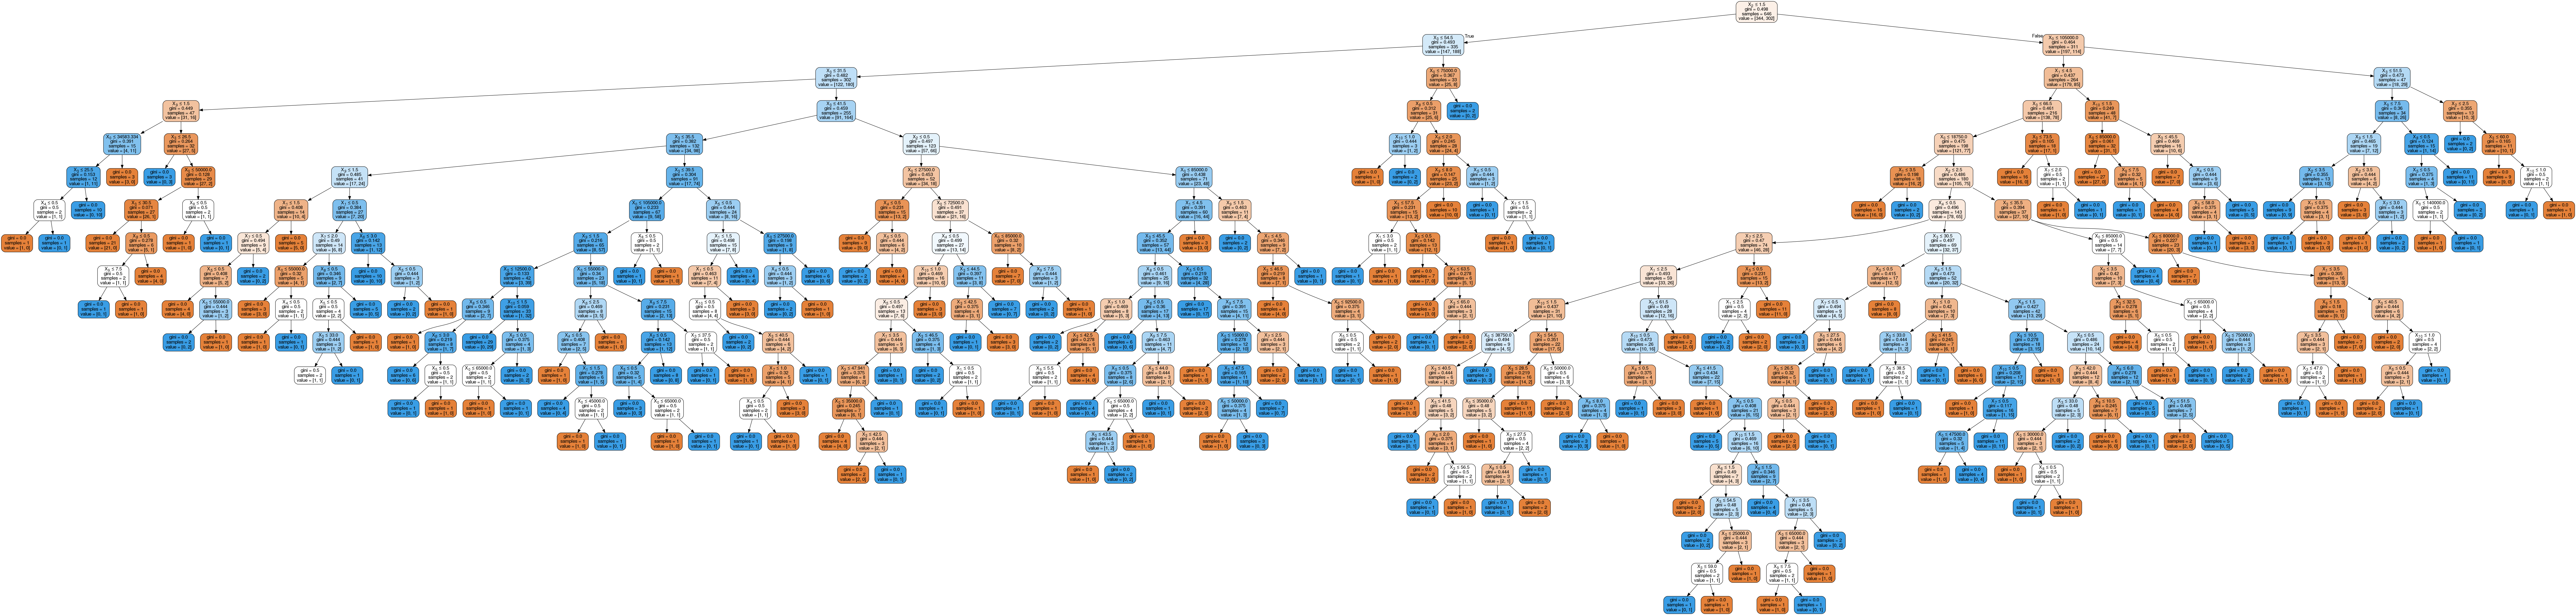

In [43]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [44]:
# split test in een x om y te voorspellen
xlaatstetest = test.drop(['Purchased Bike'], axis=1)
ylaatstetest = test['Purchased Bike']
ylaatstepred = decision_tree.predict(xlaatstetest)

In [45]:
len(ylaatstepred)

192

In [46]:
for i in range(len(ylaatstepred)):
    print("i",i)
    print("ylaatstepred",ylaatstepred[i])
    complete_RC.at[complete_RC[complete_RC['Purchased Bike'].isnull()].index[i],'Will Purchased Bike']= ylaatstepred[i]

i 0
ylaatstepred Yes
i 1
ylaatstepred No
i 2
ylaatstepred No
i 3
ylaatstepred No
i 4
ylaatstepred No
i 5
ylaatstepred No
i 6
ylaatstepred Yes
i 7
ylaatstepred No
i 8
ylaatstepred No
i 9
ylaatstepred No
i 10
ylaatstepred No
i 11
ylaatstepred Yes
i 12
ylaatstepred No
i 13
ylaatstepred No
i 14
ylaatstepred No
i 15
ylaatstepred Yes
i 16
ylaatstepred Yes
i 17
ylaatstepred Yes
i 18
ylaatstepred Yes
i 19
ylaatstepred Yes
i 20
ylaatstepred Yes
i 21
ylaatstepred No
i 22
ylaatstepred No
i 23
ylaatstepred Yes
i 24
ylaatstepred No
i 25
ylaatstepred Yes
i 26
ylaatstepred No
i 27
ylaatstepred Yes
i 28
ylaatstepred Yes
i 29
ylaatstepred No
i 30
ylaatstepred Yes
i 31
ylaatstepred Yes
i 32
ylaatstepred Yes
i 33
ylaatstepred No
i 34
ylaatstepred Yes
i 35
ylaatstepred Yes
i 36
ylaatstepred No
i 37
ylaatstepred No
i 38
ylaatstepred Yes
i 39
ylaatstepred Yes
i 40
ylaatstepred Yes
i 41
ylaatstepred No
i 42
ylaatstepred No
i 43
ylaatstepred No
i 44
ylaatstepred Yes
i 45
ylaatstepred No
i 46
ylaatstepred No
i

In [47]:
complete_RC[complete_RC['Purchased Bike'].isnull()]

,Income,Children,Cars,Age,Marital_Status_RC,Gender_RC,Education_RC,Occupation_RC,Home_Owner_RC,Commute Distance_RC,Region_RC,Purchased Bike,Will Purchased Bike
808,30000.0,2,2,50.0,1,1,2,0,1,2,2,NaN,Yes
809,40000.0,4,2,69.0,0,0,2,2,1,10,2,NaN,No
810,70000.0,3,2,52.0,1,0,4,4,1,10,2,NaN,No
811,60000.0,0,2,31.0,0,1,1,0,0,2,2,NaN,No
812,70000.0,4,2,61.0,1,0,0,4,1,11,2,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60000.0,2,2,54.0,0,1,2,2,1,5,2,NaN,No
996,65000.0,4,0,35.0,1,1,4,2,1,5,2,NaN,No
997,60000.0,2,0,38.0,0,1,0,0,1,1,2,NaN,No
998,100000.0,3,3,38.0,1,1,0,4,0,2,2,NaN,No


In [48]:
complete_RC.to_csv('complete_RC.csv')

In [49]:
complete_RC

,Income,Children,Cars,Age,Marital_Status_RC,Gender_RC,Education_RC,Occupation_RC,Home_Owner_RC,Commute Distance_RC,Region_RC,Purchased Bike,Will Purchased Bike
0,40000.0,1,0,42.0,0,0,0,0,1,1,0,No,NaN
1,30000.0,3,1,43.0,0,1,1,1,1,1,0,No,NaN
2,80000.0,5,2,60.0,0,1,1,2,0,5,0,No,NaN
3,70000.0,0,1,41.0,1,1,0,2,1,10,1,Yes,NaN
4,30000.0,0,0,36.0,1,1,0,1,0,1,0,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60000.0,2,2,54.0,0,1,2,2,1,5,2,NaN,No
996,65000.0,4,0,35.0,1,1,4,2,1,5,2,NaN,No
997,60000.0,2,0,38.0,0,1,0,0,1,1,2,NaN,No
998,100000.0,3,3,38.0,1,1,0,4,0,2,2,NaN,No
